In [5]:
import requests
import os

# Replace with your actual API key
API_KEY = '837bf06a5b684c80bc91ad5b78e5ec89'

# Setting parameters for NBA Basketball odds and spreads
SPORT = 'basketball_nba_championship_winner' # NBA sport key
REGIONS = 'us' # Focusing on US region
MARKETS = 'outrights' # Focusing on spreads market
ODDS_FORMAT = 'decimal' # Using decimal format for odds
DATE_FORMAT = 'iso' # Using ISO format for dates

# Fetching in-season sports (optional step, but useful for confirmation)
sports_response = requests.get(
    'https://api.the-odds-api.com/v4/sports', 
    params={'api_key': API_KEY}
)

if sports_response.status_code == 200:
    print('List of in season sports:', sports_response.json())
else:
    print(f'Failed to get sports: status_code {sports_response.status_code}, response body {sports_response.text}')

# Fetching NBA odds
odds_response = requests.get(
    f'https://api.the-odds-api.com/v4/sports/{SPORT}/odds',
    params={
        'api_key': API_KEY,
        'regions': REGIONS,
        'markets': MARKETS,
        'oddsFormat': ODDS_FORMAT,
        'dateFormat': DATE_FORMAT,
    }
)

if odds_response.status_code == 200:
    odds_json = odds_response.json()
    print('Number of NBA events:', len(odds_json))
    print(odds_json) # This prints the fetched odds data
    # Check the usage quota
    print('Remaining requests', odds_response.headers['x-requests-remaining'])
    print('Used requests', odds_response.headers['x-requests-used'])
else:
    print(f'Failed to get odds: status_code {odds_response.status_code}, response body {odds_response.text}')

List of in season sports: [{'key': 'americanfootball_cfl', 'group': 'American Football', 'title': 'CFL', 'description': 'Canadian Football League', 'active': True, 'has_outrights': False}, {'key': 'americanfootball_ncaaf', 'group': 'American Football', 'title': 'NCAAF', 'description': 'US College Football', 'active': True, 'has_outrights': False}, {'key': 'americanfootball_ncaaf_championship_winner', 'group': 'American Football', 'title': 'NCAAF Championship Winner', 'description': 'US College Football Championship Winner', 'active': True, 'has_outrights': True}, {'key': 'americanfootball_nfl', 'group': 'American Football', 'title': 'NFL', 'description': 'US Football', 'active': True, 'has_outrights': False}, {'key': 'americanfootball_nfl_super_bowl_winner', 'group': 'American Football', 'title': 'NFL Super Bowl Winner', 'description': 'Super Bowl Winner 2024/2025', 'active': True, 'has_outrights': True}, {'key': 'aussierules_afl', 'group': 'Aussie Rules', 'title': 'AFL', 'description'

In [9]:
import pandas as pd

# Assuming 'odds_json' is the variable holding your JSON data
odds_data = odds_json

rows = [
    {
        'id': entry['id'],
        'sport_key': entry['sport_key'],
        'sport_title': entry['sport_title'],
        'commence_time': entry['commence_time'],
        'bookmaker': bookmaker['title'],
        'market': market['key'],
        'last_update': market['last_update'],
        'team': outcome['name'],
        'price': outcome['price']
    }
    for entry in odds_data
    for bookmaker in entry['bookmakers']
    for market in bookmaker['markets']
    for outcome in market['outcomes']
]

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(rows)


In [11]:
championship_odds = df.drop(columns=['id','sport_key','sport_title','commence_time'])

In [13]:
championship_odds['implied odds'] = (1 / championship_odds['price']) * 100

In [14]:
championship_odds

,bookmaker,market,last_update,team,price,implied odds
0,BetMGM,outrights,2024-09-02T15:01:15Z,Boston Celtics,4.1,24.390244
1,BetMGM,outrights,2024-09-02T15:01:15Z,Oklahoma City Thunder,8.5,11.764706
2,BetMGM,outrights,2024-09-02T15:01:15Z,Philadelphia 76ers,9.0,11.111111
3,BetMGM,outrights,2024-09-02T15:01:15Z,Denver Nuggets,9.5,10.526316
4,BetMGM,outrights,2024-09-02T15:01:15Z,New York Knicks,10.0,10.000000
...,...,...,...,...,...,...
145,Bovada,outrights,2024-09-02T15:05:42Z,Toronto Raptors,1001.0,0.099900
146,Bovada,outrights,2024-09-02T15:05:42Z,Brooklyn Nets,1001.0,0.099900
147,Bovada,outrights,2024-09-02T15:05:42Z,Detroit Pistons,1001.0,0.099900
148,Bovada,outrights,2024-09-02T15:05:42Z,Portland Trail Blazers,1001.0,0.099900


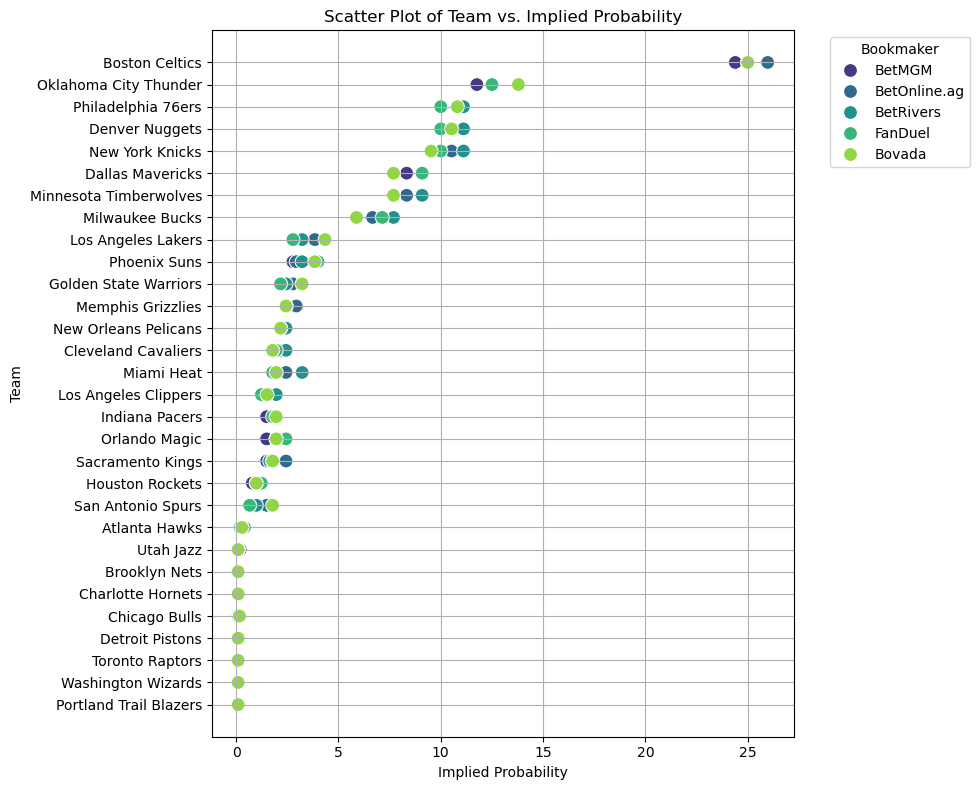

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and has the necessary columns
# If your data is in a CSV, load it with df = pd.read_csv("your_file.csv")

# Initialize the plot
plt.figure(figsize=(10, 8))

# Create the scatter plot
sns.scatterplot(
    data=championship_odds,  # Specify the DataFrame here
    x='implied odds',
    y='team',
    hue='bookmaker',
    palette='viridis',  # You can choose another color palette if you like
    s=100  # Size of the dots
)

# Customize the plot
plt.title('Scatter Plot of Team vs. Implied Probability')
plt.xlabel('Implied Probability')
plt.ylabel('Team')
plt.grid(True)
plt.legend(title='Bookmaker', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()
